## 4.1 회귀분석 예제

특정한 입력변수값을 사용하여 출력변수의 값을 계산하는 것을 예측(prediction)문제라고 한다. 예측문제 중에서 출력변수의 값이 연속값인 문제를 회귀(regression) 또는 회귀분석(regression analysis) 문제라고 한다. 이 절에서는 회귀분석의 몇가지 예를 들어본다.

### 보스턴 집값 예측

sklearn 패키지의 datasets 서브패키지는 회귀분석을 공부하기 위한 예제를 제공한다. 그 중 `load_boston()` 명령으로 받을 수 있는 보스턴 주택 가격 데이터는 다음과 같은 데이터이다. 보스턴의 506개 타운(town)의 13개 독립변수값로부터 해당 타운의 주택가격 중앙값을 예측하는 문제다. 사용할 수 있는 특징 데이터는 다음과 같다.

* 독립변수
 * `CRIM`: 범죄율
 * `INDUS`: 비소매상업지역 면적 비율
 * `NOX`: 일산화질소 농도 
 * `RM`: 주택당 방 수
 * `LSTAT`: 인구 중 하위 계층 비율
 * `B`: 인구 중 흑인 비율
 * `PTRATIO`: 학생/교사 비율
 * `ZN`: 25,000 평방피트를 초과 거주지역 비율
 * `CHAS`: 찰스강의 경계에 위치한 경우는 1, 아니면 0
 * `AGE`: 1940년 이전에 건축된 주택의 비율
 * `RAD`: 방사형 고속도로까지의 거리
 * `DIS`: 직업센터의 거리
 * `TAX`:	재산세율
 
* 종속변수
 * 보스턴 506개 타운의 1978년 주택 가격 중앙값 (단위 1,000 달러)

`load_boston` 명령으로 받는 데이터 집합은 `Bunch` 라는 클래스 객체로 생성된다. 이 클래스 객체는 다음과 같은 속성을 가진다.


 * `data`: 독립변수 `ndarray` 배열
 * `target`: 종속변수 `ndarray` 배열
 * `feature_names`: 독립변수 이름 리스트
 * `target_names`: (옵션) 종속변수 이름 리스트
 * `DESCR`: (옵션) 자료에 대한 설명 문자열

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

분석할 데이터는 pandas 데이터프레임 형태로 만들어야 한다. 여기에서는 독립변수 행렬을 `dfX`로, 종속변수 벡터를 `dfy`로 만든다. 종속변수의 이름은 MEDV로 지정한다.

In [2]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

독립변수과 종속변수 데이터프레임을 하나의 데이터프레임으로 묶어두면 편리하다.

In [3]:
df = pd.concat([dfX, dfy], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


일부 독립변수와 종속변수의 관계를 스캐터플롯(scatter plot)으로 살펴보자.

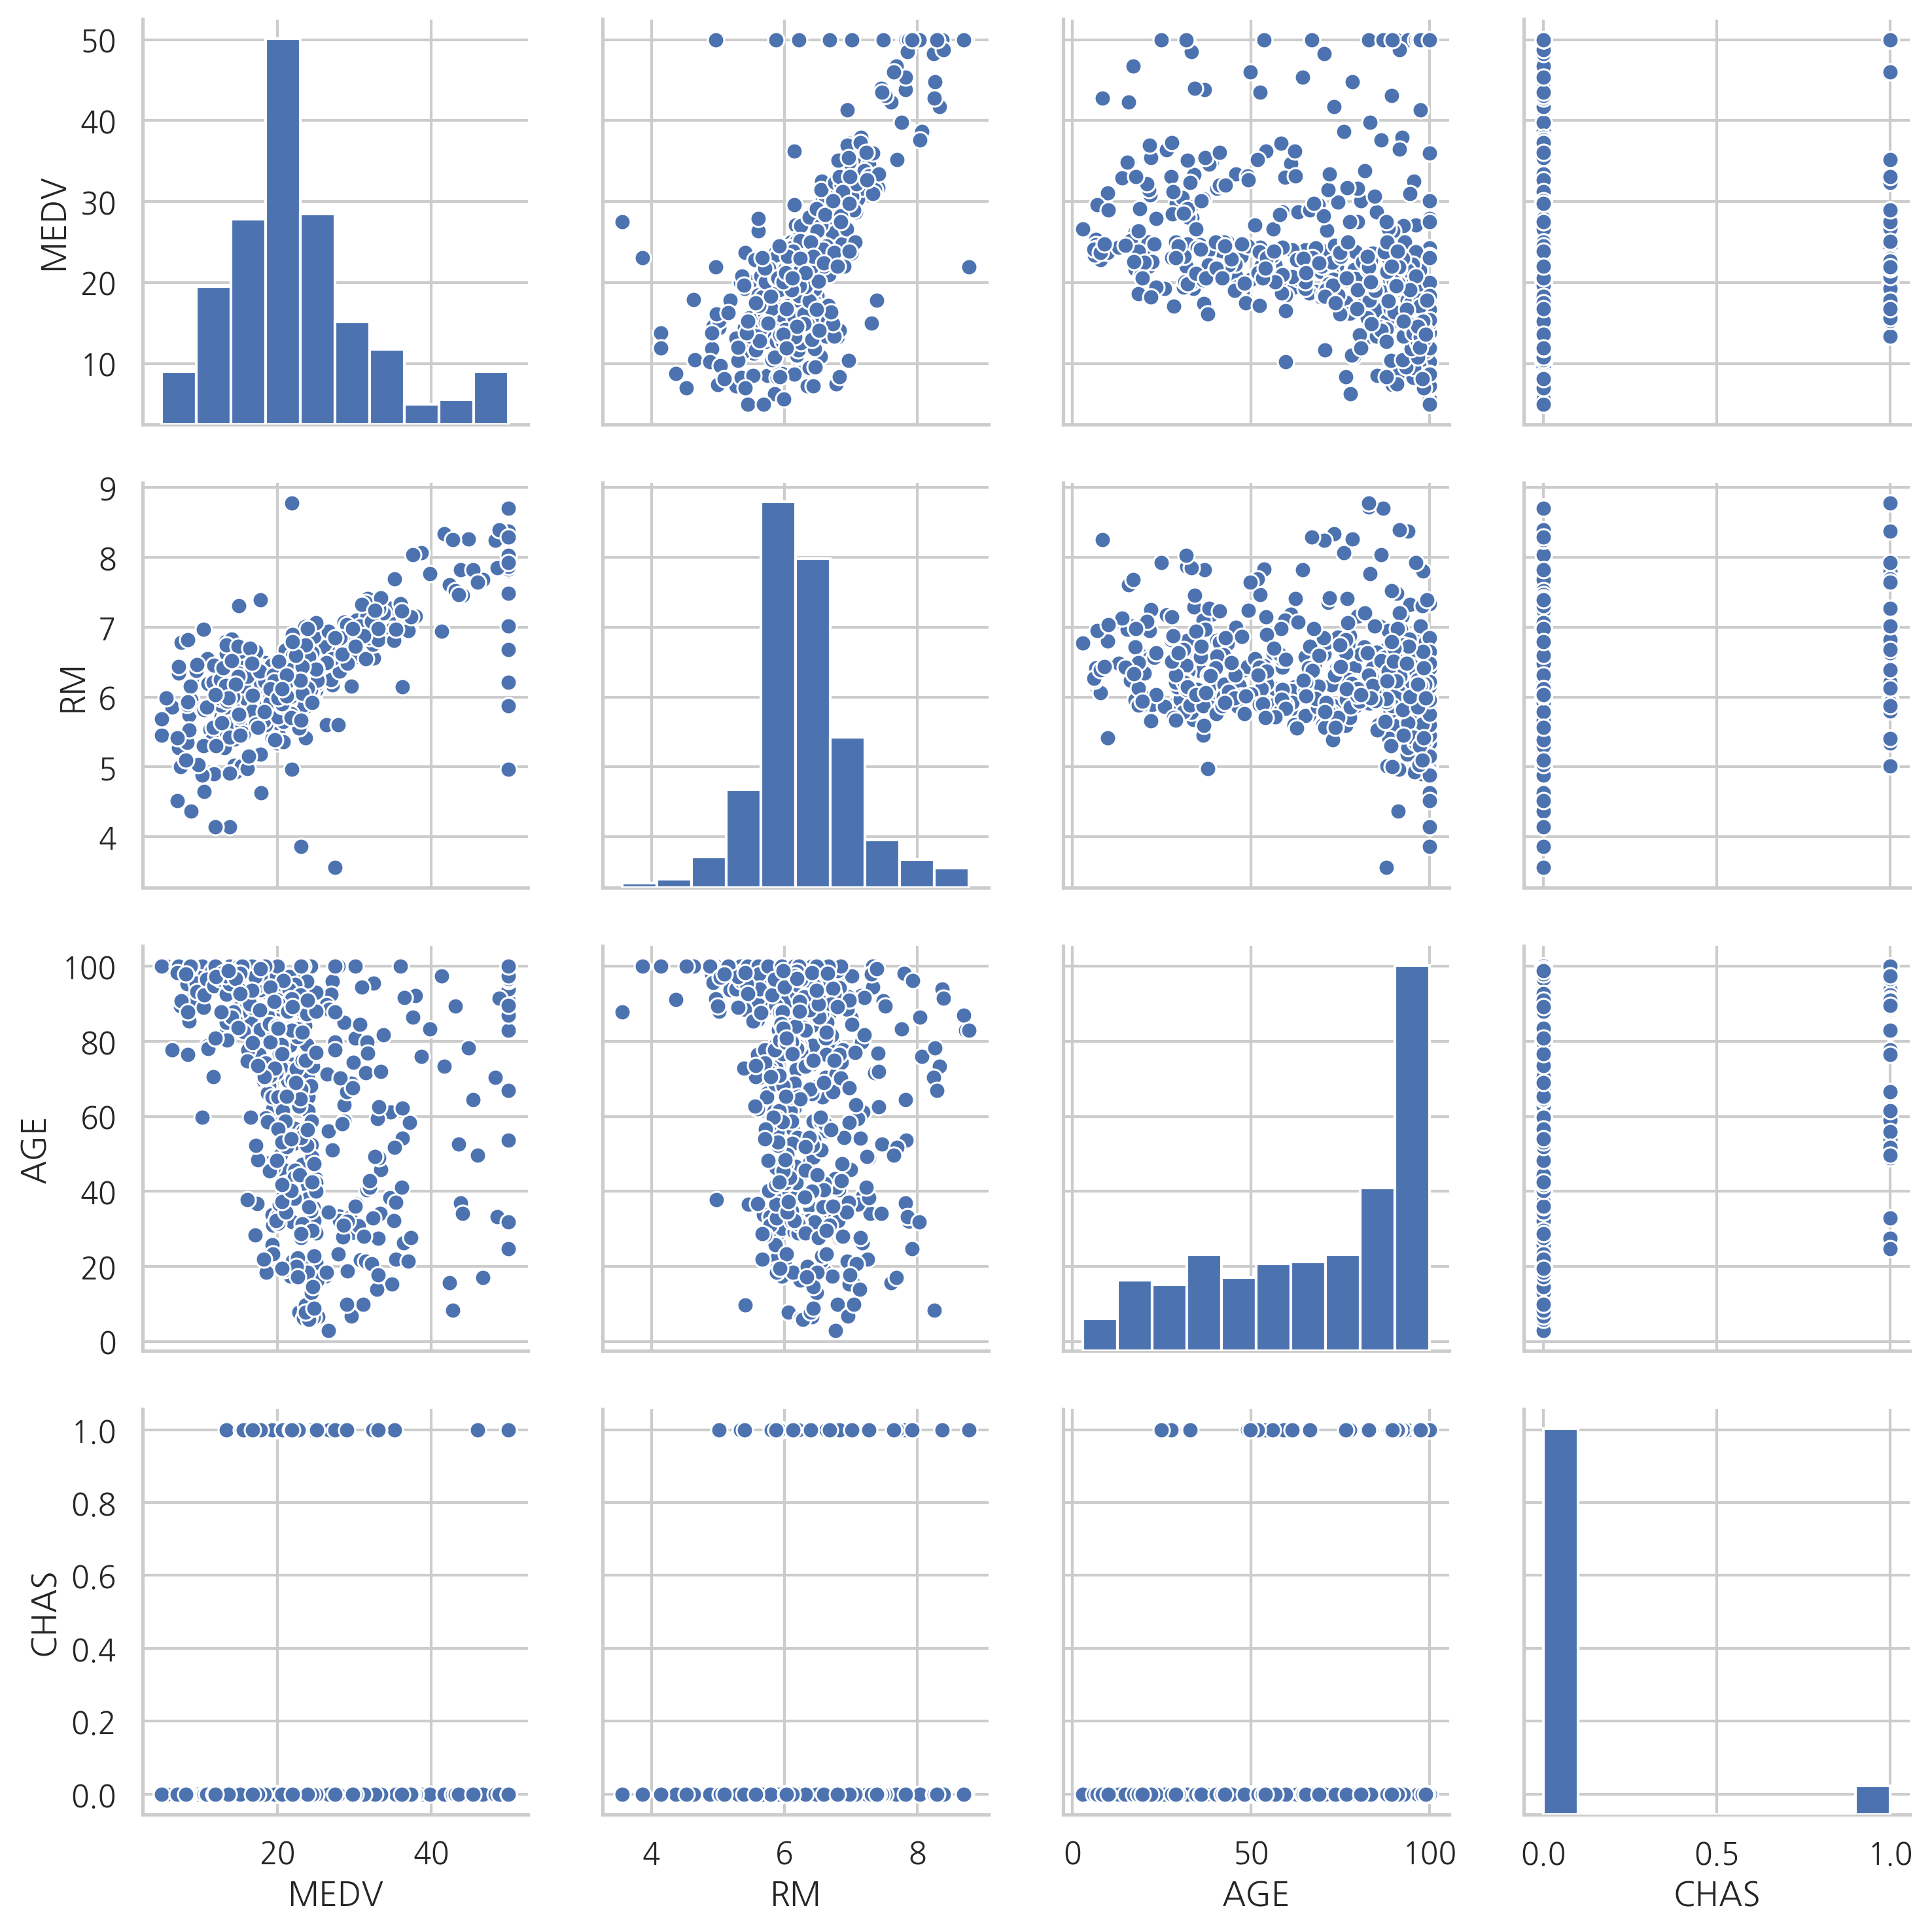

In [4]:
sns.pairplot(df[["MEDV", "RM", "AGE", "CHAS"]])
plt.show()

이 플롯의 첫 행을 보면 종속변수인 집값(MEDV)과 방 개수(RM), 노후화 정도(AGE)와 어떤 관계를 가지는지 알 수 있다.

* 방 개수가 증가할 수록 집값은 증가하는 경향이 뚜렷하다.
* 노후화 정도와 집값은 관계가 없어 보인다.

또한 스케터플롯의 모양으로부터 찰스강 유역 여부(CHAS)는 범주값이며 값이 1이면 0일 때 보다 집값의 평균이 더 높아지는 것도 볼 수 있다.

### 당뇨병 진행도 예측

scikit-learn 패키지가 제공하는  당뇨병 진행도 예측용 데이터는 442명의 당뇨병 환자를 대상으로한 검사 결과를 나타내는 데이터이다.

다음과 같은 10 종류의 독립변수를 가지고 있다. 독립변수의 값들은 모두 스케일링(scaling)되었다.

* age: 나이
* sex: 성별
* bmi: BMI(Body mass index)지수
* bp: 평균혈압
* s1~s6: 6종류의 혈액검사수치

종속변수는 1년 뒤 측정한 당뇨병의 진행률이다.

In [5]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


스케터플롯을 그려보면 독립변수인 BMI지수와 평균혈압이 종속변수인  당뇨병 진행도와 양의 상관관계를 가지는 것을 볼 수 있다. 또한 두 독립변수 BMI지수와 평균혈압도 서로 양의 상관관계를 가진다. 이렇게 독립변수끼리 상관관계를 가지는 것을 다중공선성(multicolinearity)이라고 한다. 다중공선성은 회귀분석의 결과에 영향을 미칠 수 있다.

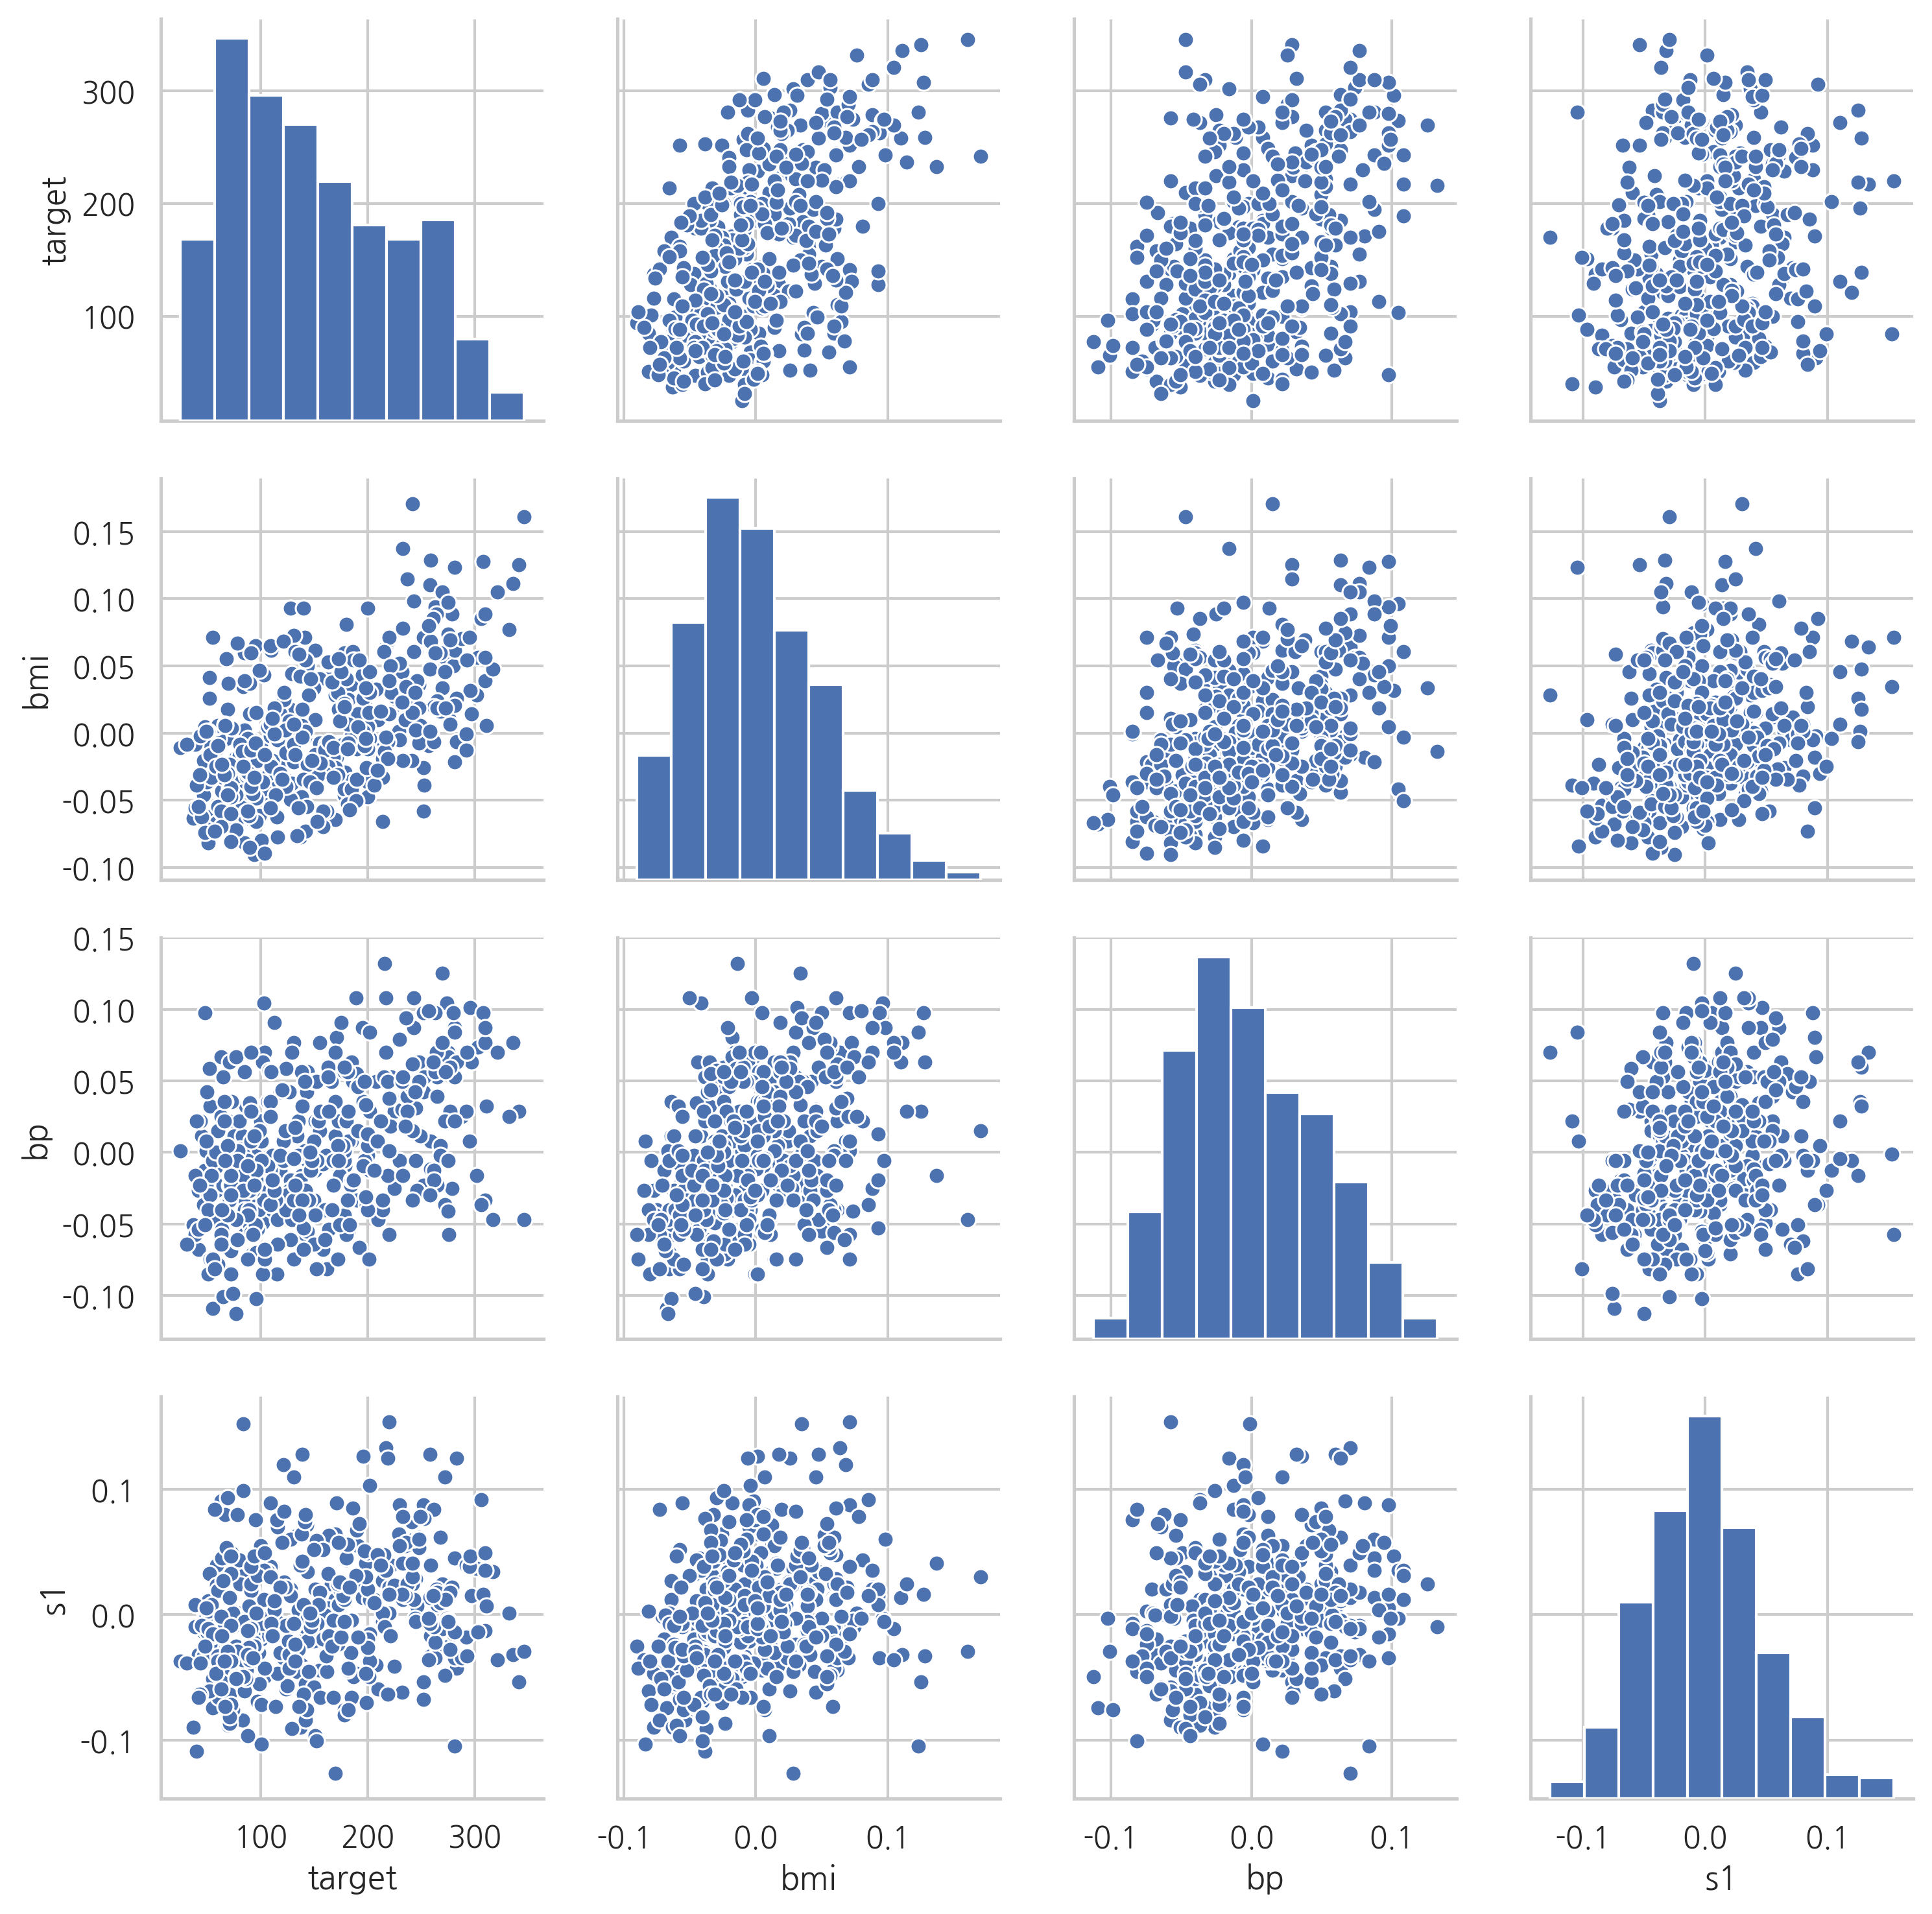

In [6]:
sns.pairplot(df[["target", "bmi", "bp", "s1"]])
plt.show()

#### 연습 문제 4.1.1

sklearn.datasets 패키지의 `fetch_california_housing` 명령은 캘리포니아 주택가격을 예측하기위한 데이터다. 이 데이터의 독립변수를 조사하고 어떤 데이터들이 주택가격과 상관관계가 있는지를 조사한다. 또한 서로 강한 상관관계를 가지는 독립변수도 알아보자. 

### 가상 데이터 예측

scikit-learn 패키지는 가상의 회귀분석 문제를 만들어주는 `make_regression()` 명령도 제공한다. 사용법은 다음과 같다.

```
X, y, w = make_regression(n_samples, n_features, bias, noise, random_state, coef=True)
```

 * `n_samples` : 정수 (옵션, 디폴트 100)
    * 표본 데이터의 갯수 $N$
 * `n_features` : 정수 (옵션, 디폴트 100)
    * 독립변수(feature)의 수(차원) $M$
 * `bias` : 실수 (옵션, 디폴트 0)
    * y 절편
 * `noise` : 실수 (옵션, 디폴트 0)
    * 출력 즉, 종속변수에 더해지는 잡음 $\epsilon$의 표준편차
 * `random_state` : 정수 (옵션, 디폴트 None)
   * 난수 발생용 시드값 
 * `coef` : 불리언 (옵션, 디폴트 False)
   * True 이면 선형 모형의 계수도 출력

출력은 다음과 같다.

 * `X` : [`n_samples`, `n_features`] 형상의 2차원 배열
    * 독립변수의 표본 데이터 행렬 $X$
 * `y` : [`n_samples`] 형상의 1차원 배열
    * 종속변수의 표본 데이터 벡터 $y$
 * `w` : [`n_features`] 형상의 1차원 배열 또는 [`n_features`, `n_targets`] 형상의 2차원 배열 (옵션)
    * 선형 모형의 계수 벡터 $w$, 입력 인수 `coef`가 True 인 경우에만 출력됨

`make_regression()` 명령은 내부적으로 다음 과정을 거쳐 가상의 데이터를 만든다.

1. 독립변수 데이터 행렬 `X`를 무작위로 만든다.
2. 종속변수와 독립변수를 연결하는 가중치 벡터 `w`를 무작위로 만든다.
3. `X`와  `w`를 내적하고 y절편 `b` 값을 더하여 독립변수와 완전선형인 종속변수 벡터 `y_0`를 만든다.
4. 기댓값이 0이고 표준편차가 `noise`인 정규분포를 이용하여 잡음 `epsilon`를 만든다.
5. 독립변수와 완전선형인 종속변수 벡터 `y_0`에 잡음 `epsilon`을 더해서 종속변수 데이터 $y$를 만든다.

$$ y = w^Tx + b + \epsilon $$

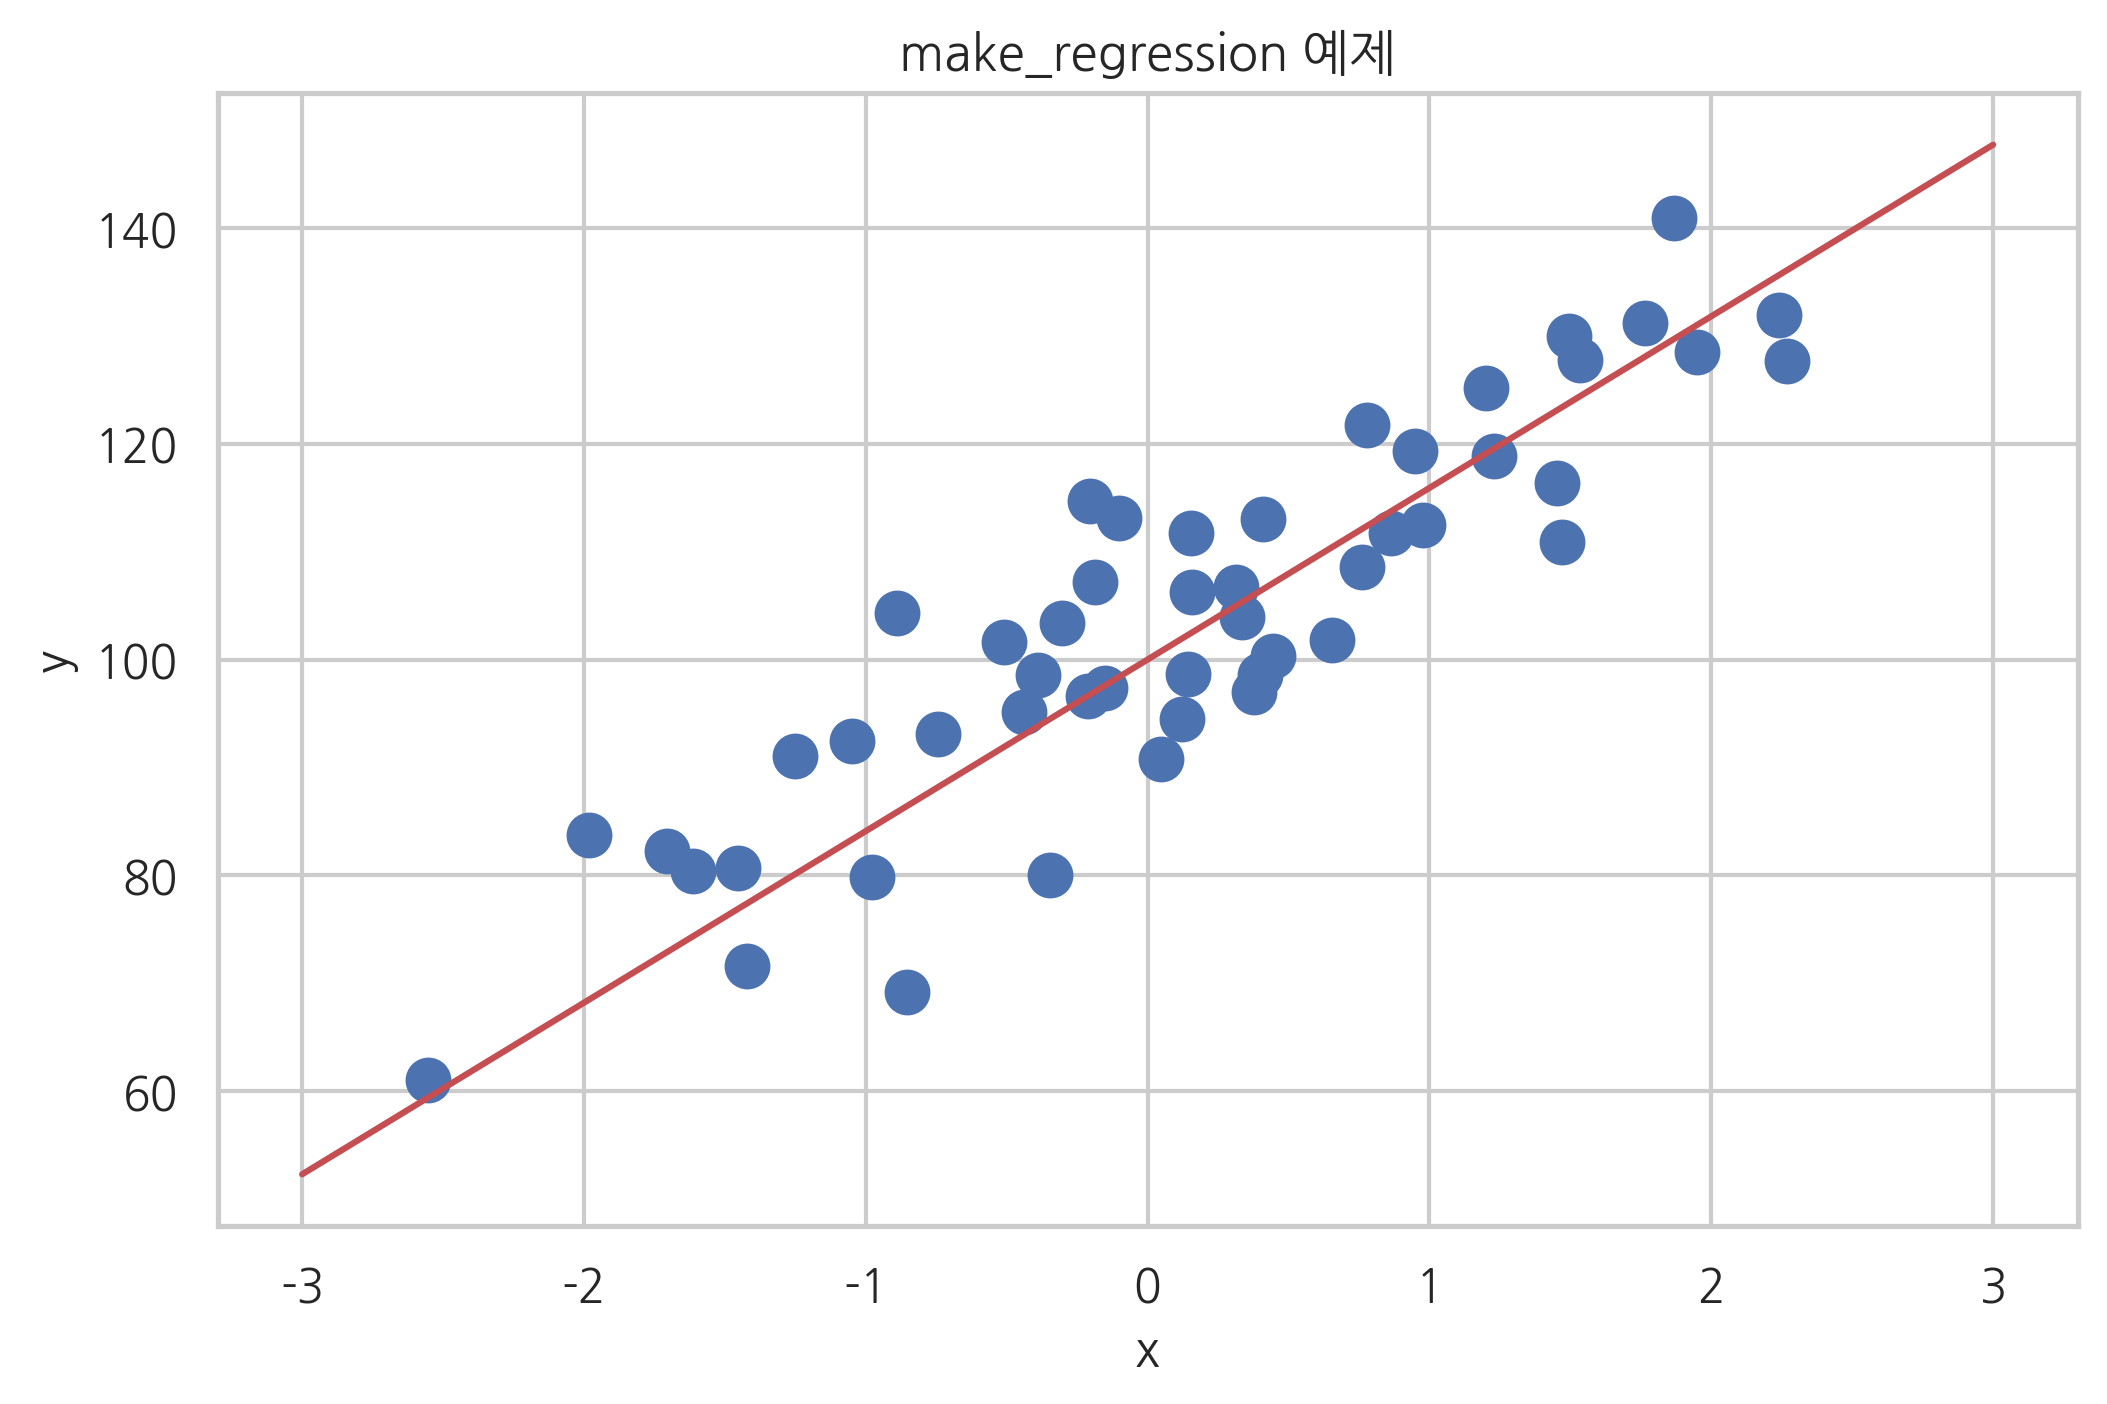

In [7]:
from sklearn.datasets import make_regression

X, y, w = make_regression(
    n_samples=50, n_features=1, bias=100, noise=10, coef=True, random_state=0
)

xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100
plt.plot(xx, y0, "r-")
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("make_regression 예제")
plt.show()

#### 연습 문제 4.1.2

`make_regression`과 같은 기능을 하는 함수 `make_regression2`를 만들어라. 단 `make_regression2`는 `coef=True,  n_features=1` 라고 가정한다. 즉 항상 가중치 계수를 반환하고 1차원 독립변수만 생성할 수 있다. 따라서 `make_regression2`는 다음과 같은 인수만 가진다.

* `n_samples`
* `bias`
* `noise`
* `random_state`

따라서 함수 사용법은 다음과 같아야 한다.

```
X, y, w = make_regression2(n_samples, bias, noise, random_state)
```

독립변수가 2개인 표본 데이터를 생성하여 스캐터플롯을 그리면 다음과 같다. 종속변숫값은 점의 명암으로 표시하였다. 점의 밝기가 밝으면 종속변숫값이 큰 것이고 점의 밝기가 어두우면 종속변숫값이 작은것이다. 스캐터플롯에서 x1, x2가 증가할수록 종속변숫값이 커지는 것을 알 수 있다.

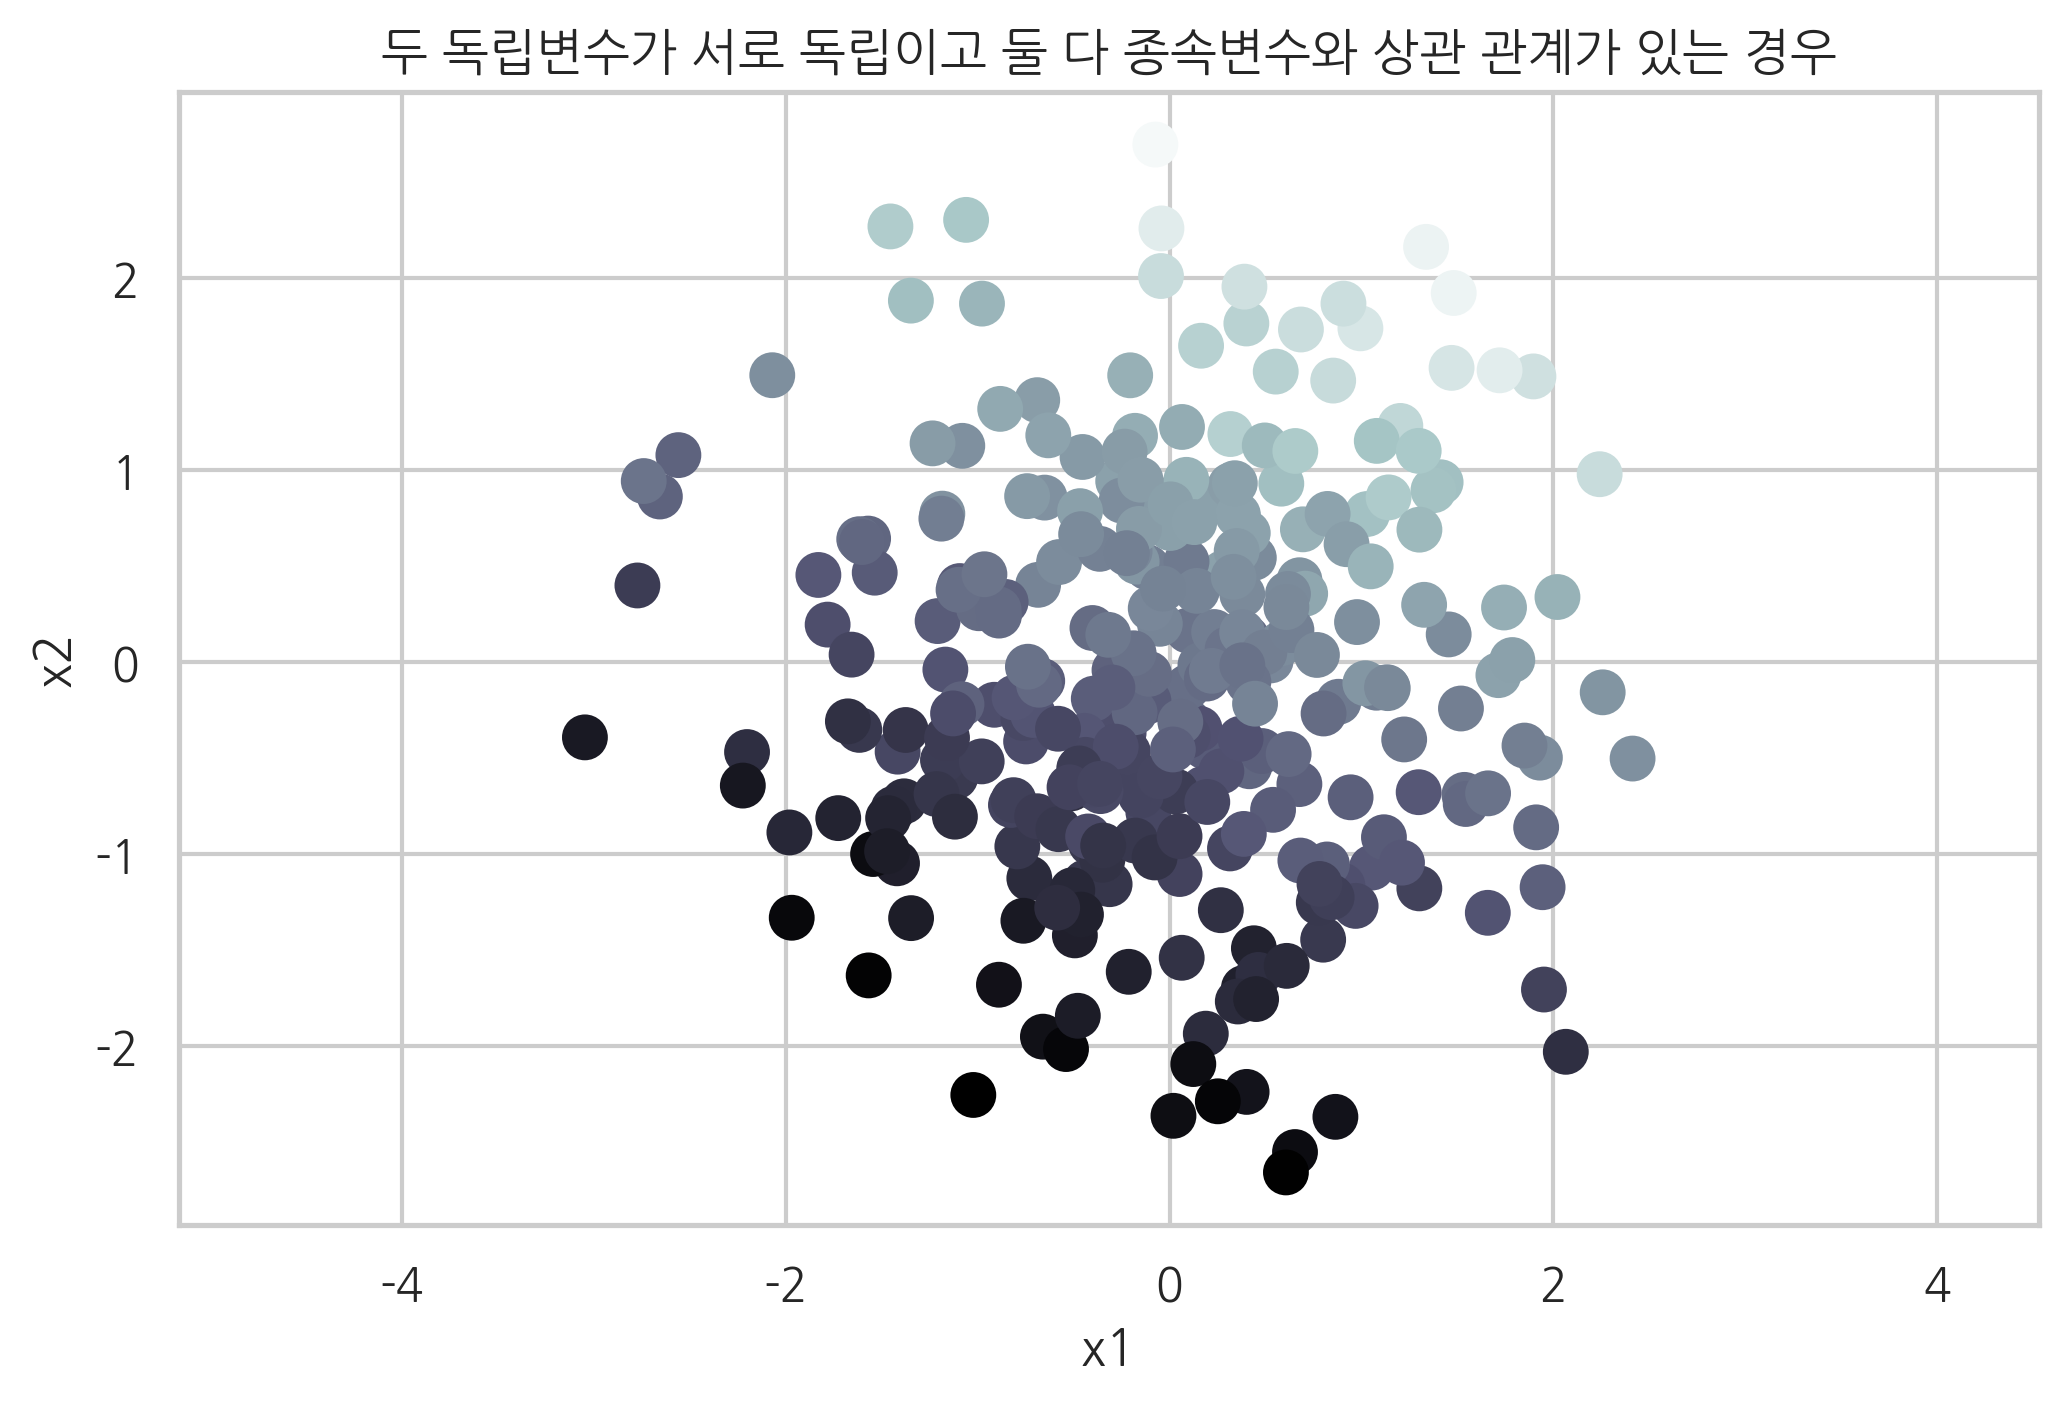

In [8]:
X, y, w = make_regression(
    n_samples=300, n_features=2, noise=10, coef=True, random_state=0
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립변수가 서로 독립이고 둘 다 종속변수와 상관 관계가 있는 경우")
plt.show()

`make_regression` 명령은 위에서 설명한 인수 이외에도 다음과 같은 인수를 가질 수 있다.

* `n_informative` : 정수 (옵션, 디폴트 10)
    * 독립변수(feature) 중 실제로 종속변수와 상관 관계가 있는 독립변수의 수(차원)
* `effective_rank`: 정수 또는 None (옵션, 디폴트 None)
    * 독립변수(feature) 중 서로 독립인 독립변수의 수. 만약 None이면 모두 독립
* `tail_strength` : 0부터 1사이의 실수 (옵션, 디폴트 0.5)
    * `effective_rank`가 None이 아닌 경우 독립변수간의 상관관계를 결정하는 변수. 0.5면 독립변수간의 상관관계가 없다.

예를 들어 두 독립변수 중 실제로 종속변수에 영향을 미치는 독립변수는 하나 뿐이라면 다음처럼 `n_informative=1`로 설정한다. 스캐터플롯에서 독립변수 x1은 종속변수에 영향을 미치지 않는 것을 알 수 있다.

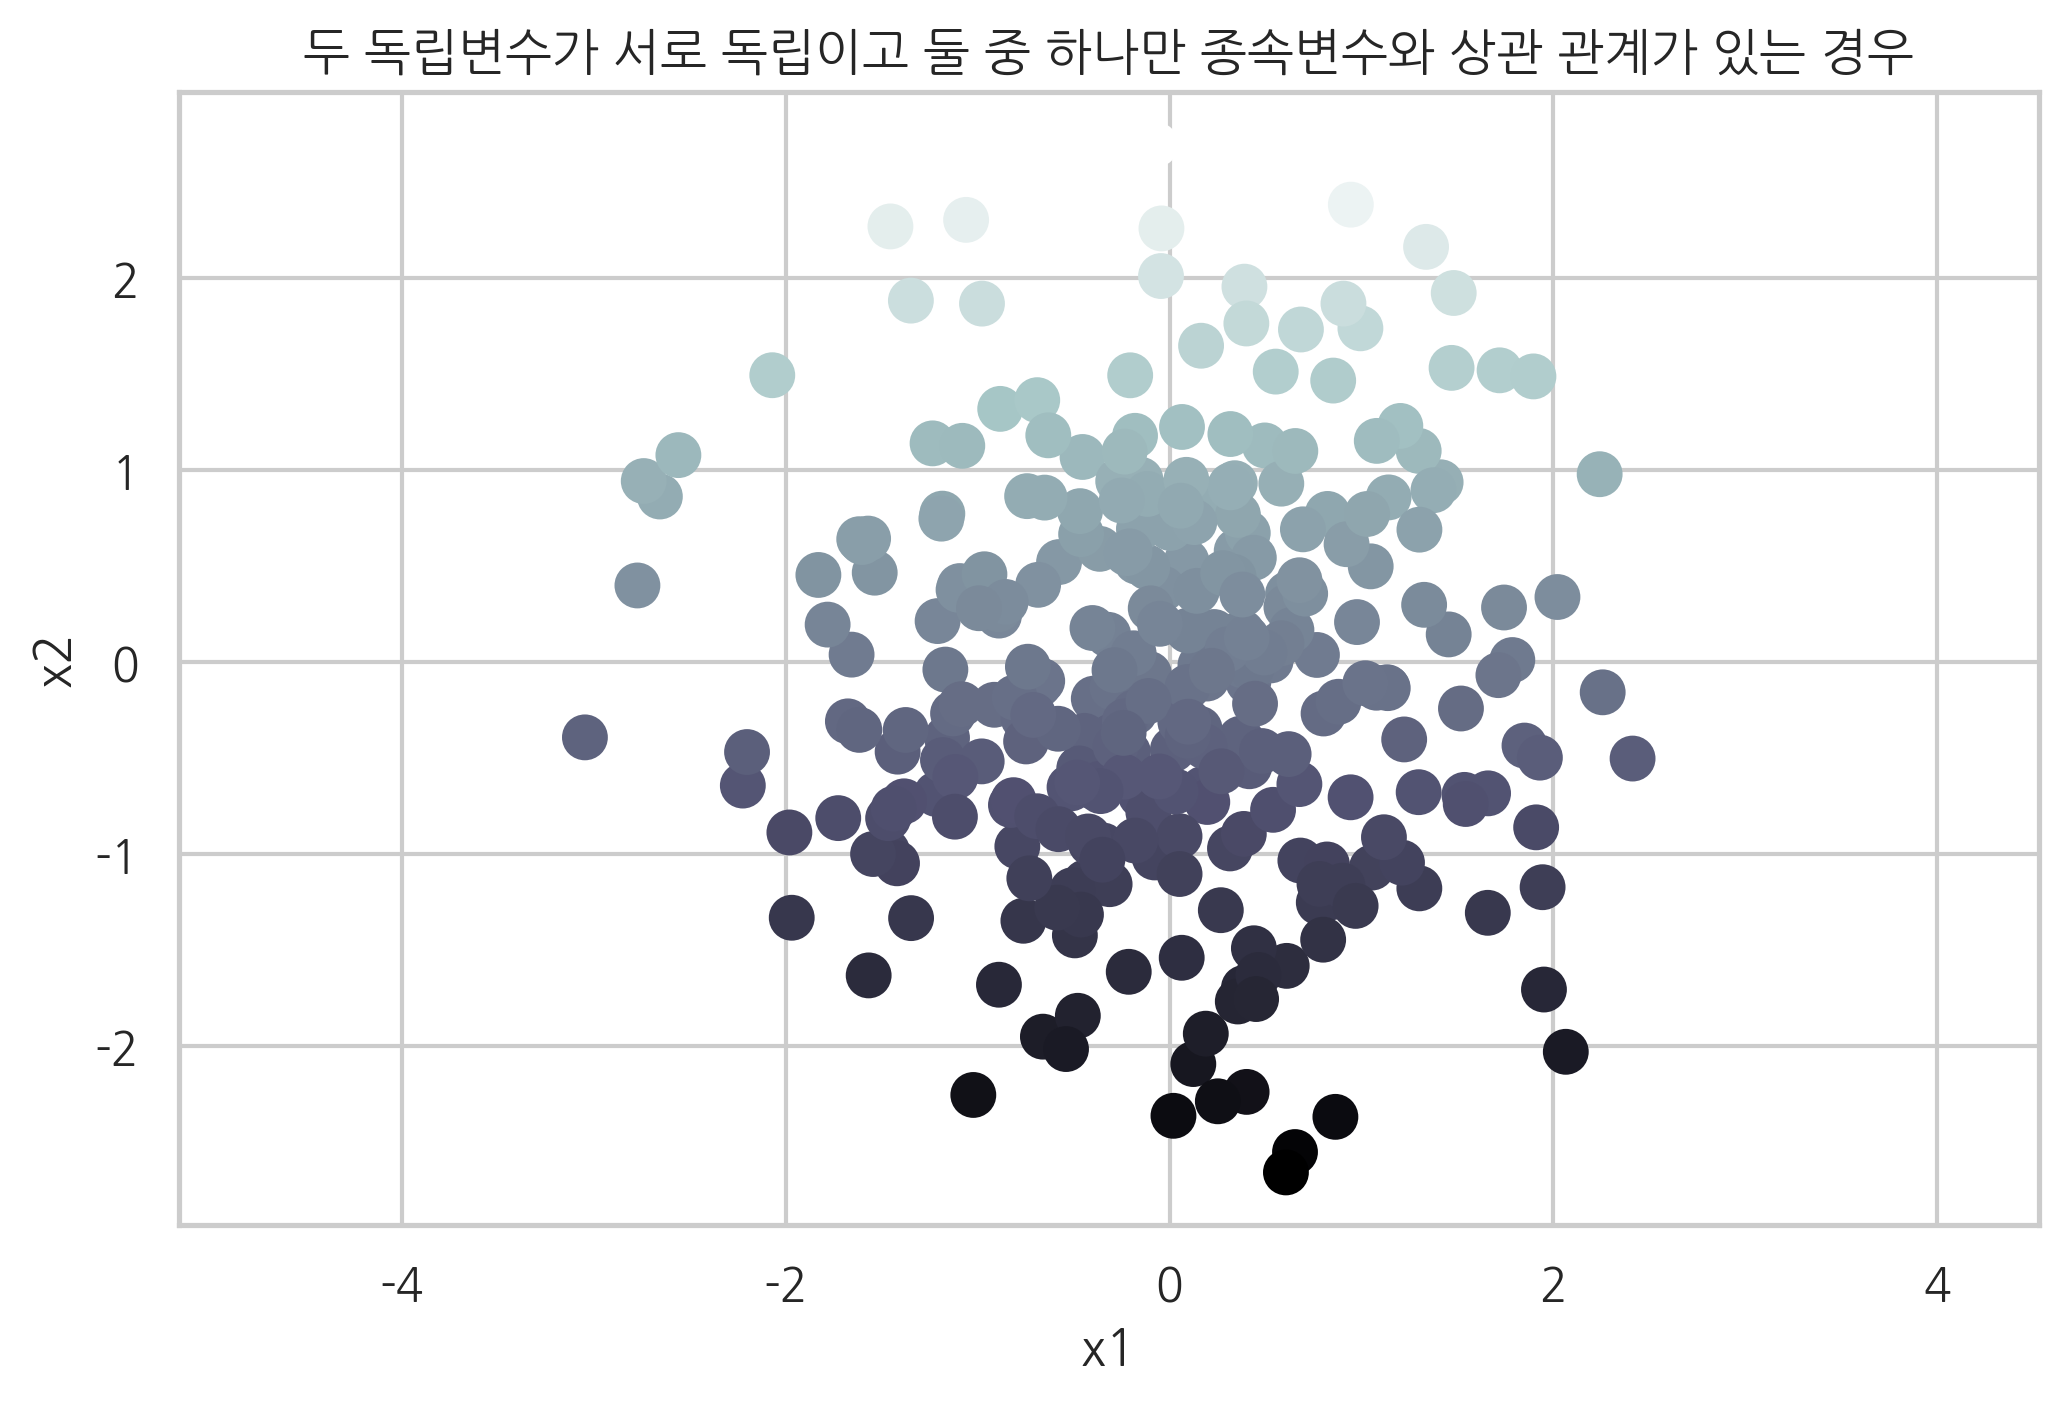

In [9]:
X, y, w = make_regression(
    n_samples=300, n_features=2, n_informative=1, noise=0, coef=True, random_state=0
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립변수가 서로 독립이고 둘 중 하나만 종속변수와 상관 관계가 있는 경우")
plt.show()

만약 두 독립변수가 서로 독립이 아니고 상관관계를 가지는 다중공선성 데이터를 만드는 경우에는 `tail_strength` 인수를 0에 가까운 작은 값으로 설정한다.

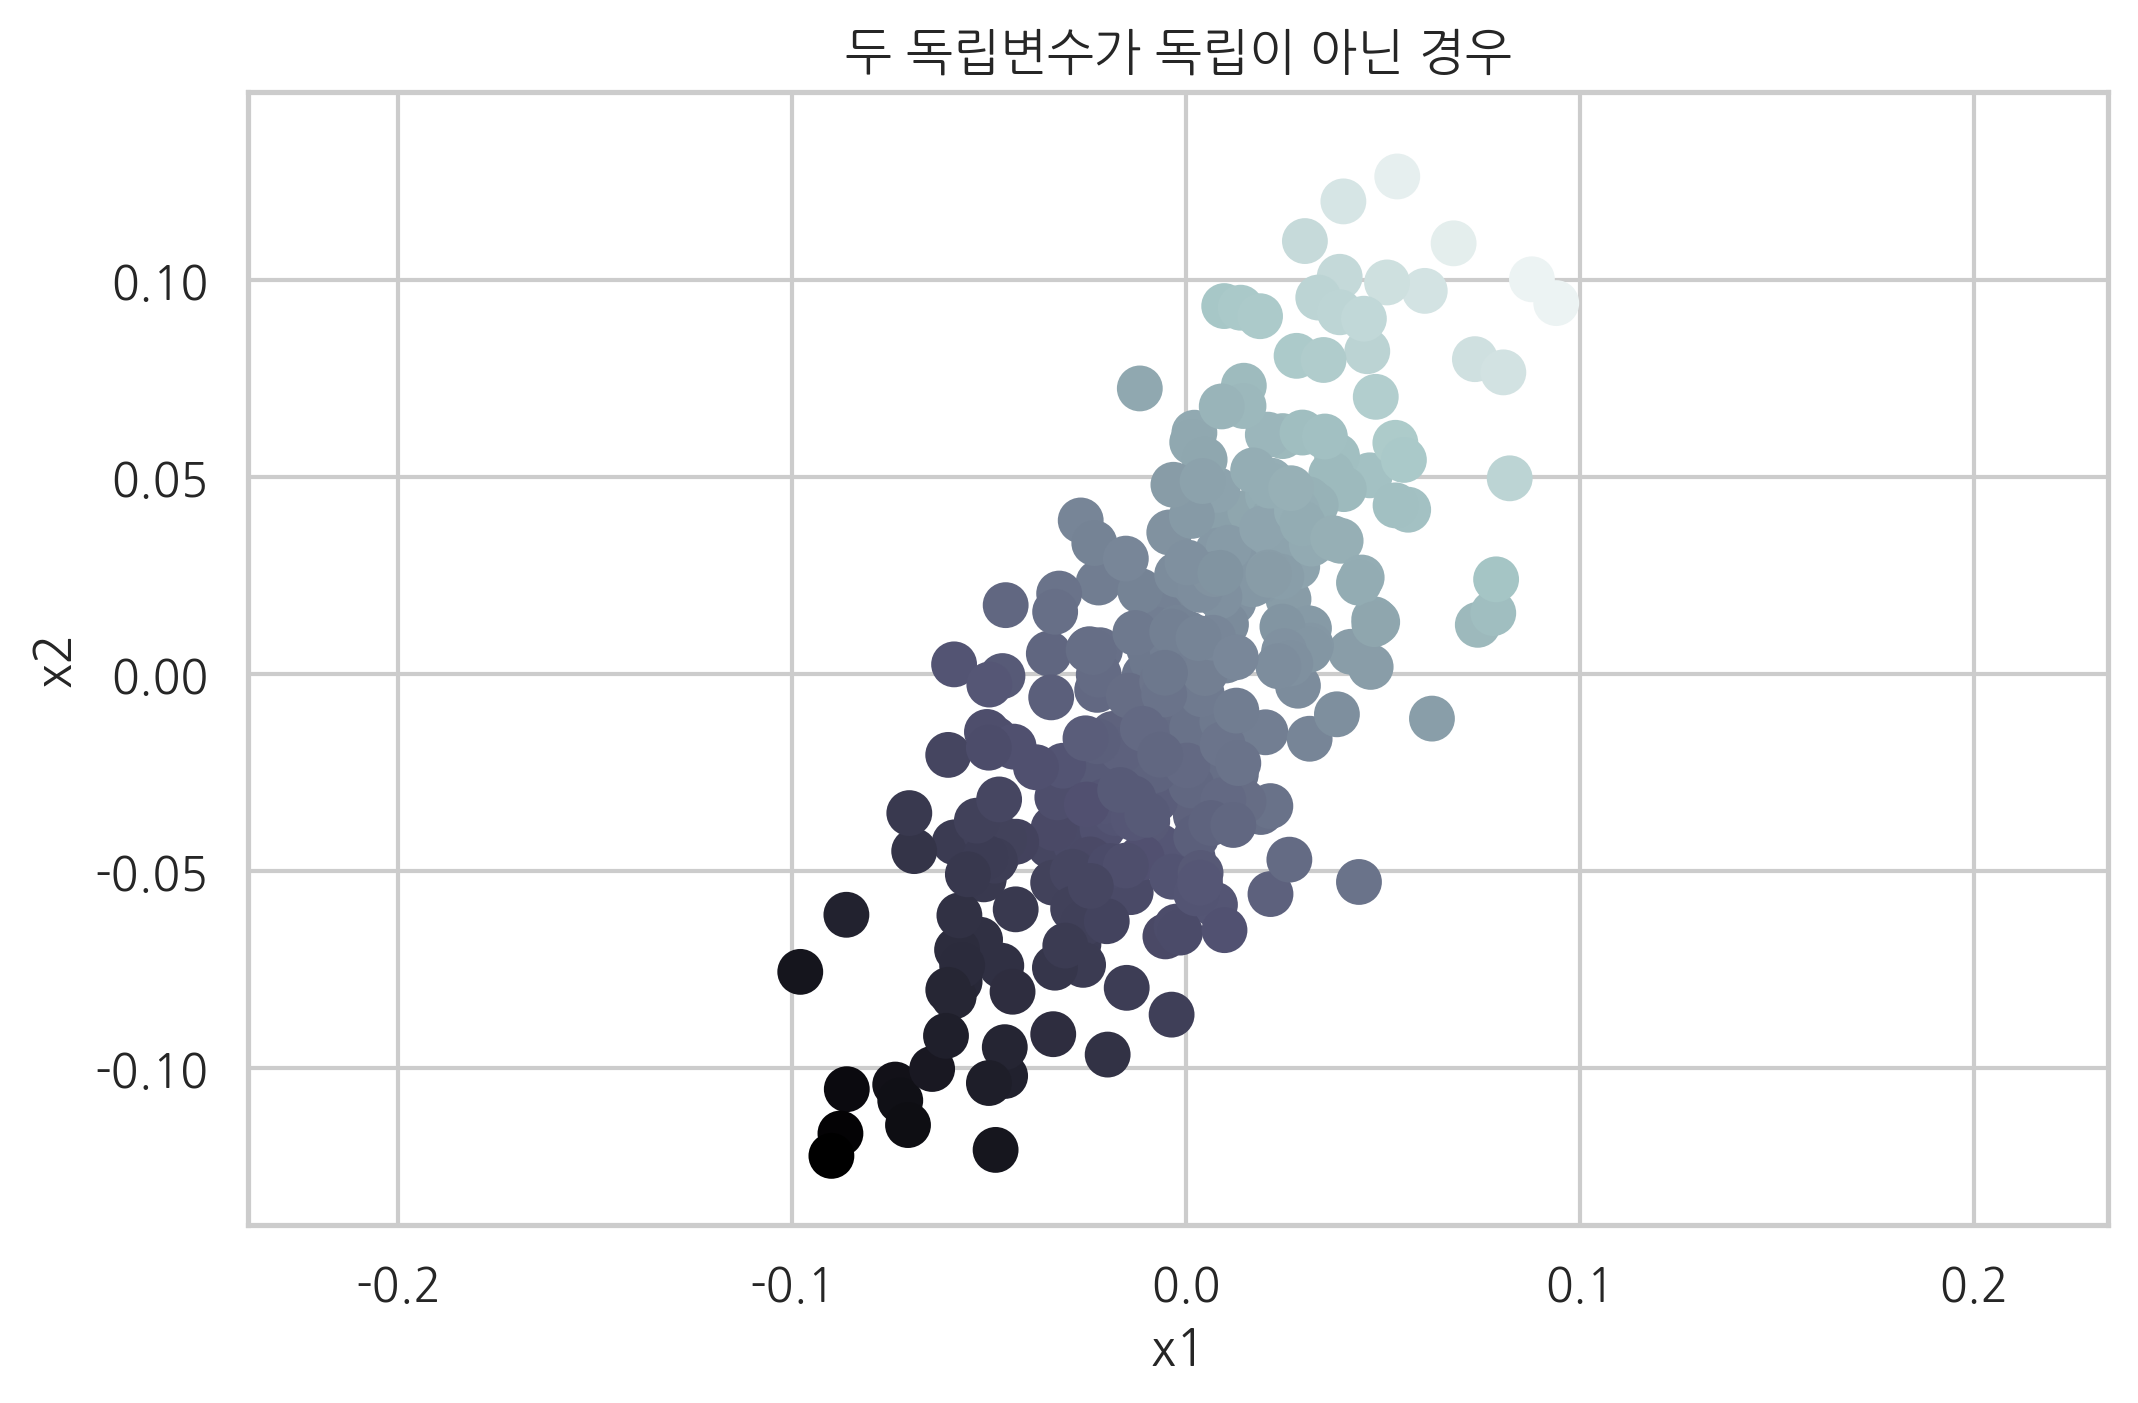

In [10]:
X, y, w = make_regression(
    n_samples=300, n_features=2, effective_rank=1, noise=0, coef=True, random_state=0,
    tail_strength=0
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립변수가 독립이 아닌 경우")
plt.show()